In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
fires = pd.read_csv('forest_fires.csv')

In [3]:
X = fires[['Temp']]
y = fires[['FFMC']]

Text(0, 0.5, 'FFMC')

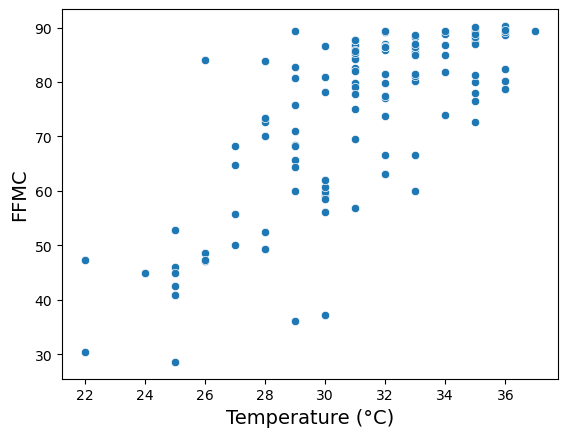

In [4]:
# Scatter plot of temperature vs. FFMC
sns.scatterplot(x=np.ravel(X), y=np.ravel(y))
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('FFMC', fontsize=14)

In [6]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [8]:
# Initialize and fit a linear svr model to training data
eps = 0.1
svr_lin = SVR(kernel='linear', epsilon=eps)
svr_lin.fit(np.reshape(X_train,(-1,1)), np.ravel(y_train))

SVR(kernel='linear')

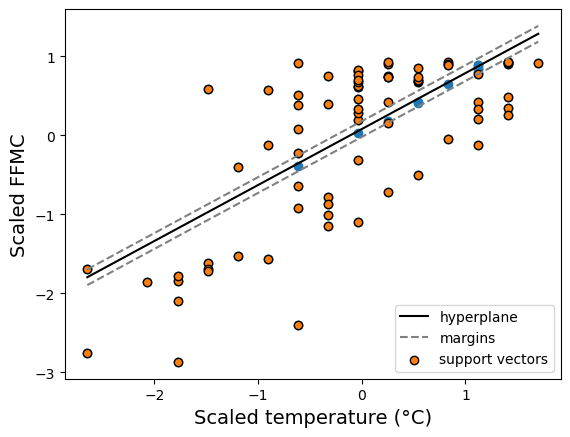

In [9]:
# Plot of support vector regressor, margins, and support vectors
w = svr_lin.coef_[0][0]
b = svr_lin.intercept_[0]
x_min = np.ravel(X_train).min()
x_max = np.ravel(X_train).max()

plt.scatter(x=np.ravel(X_train), y=np.ravel(y_train))
plt.plot([x_min, x_max], [w * x_min + b, w * x_max + b], color='black', label='hyperplane')
plt.plot([x_min, x_max], [w * x_min + b + eps, w * x_max + b + eps], color='grey', linestyle='--', label='margins')
plt.plot([x_min, x_max], [w * x_min + b - eps, w * x_max + b - eps], color='grey', linestyle='--')
plt.scatter(x = np.ravel(X_train)[svr_lin.support_], y = np.ravel(y_train)[svr_lin.support_], color='C1', edgecolors= 'black', label='support vectors')
plt.xlabel('Scaled temperature (°C)', fontsize=14)
plt.ylabel('Scaled FFMC', fontsize=14)
plt.legend(loc='lower right')

In [9]:
# Initialize and fit svr models using poly and rbf kernels
svr_poly = SVR(kernel='poly', epsilon=eps, C=0.2, gamma=0.8)
svr_rbf = SVR(kernel='rbf', epsilon=eps, C=0.2, gamma=0.8)
svr_poly.fit(np.reshape(X_train,(-1,1)), np.ravel(y_train))
svr_rbf.fit(np.reshape(X_train,(-1,1)), np.ravel(y_train))

SVR(C=0.2, gamma=0.8)

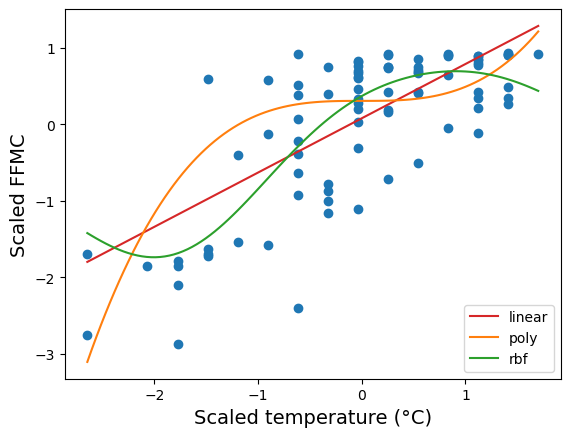

In [10]:
# Plot of hypersurface using linear, poly, and rbf kernels
x_min = np.ravel(X_train).min()
x_max = np.ravel(X_train).max()
x_pred = np.linspace(x_min, x_max, 100)

plt.scatter(x=np.ravel(X_train), y=np.ravel(y_train))
plt.plot(x_pred,svr_lin.predict(np.reshape(x_pred,(-1,1))),label='linear', color='C3')
plt.plot(x_pred,svr_poly.predict(np.reshape(x_pred,(-1,1))),label='poly', color='C1')
plt.plot(x_pred,svr_rbf.predict(np.reshape(x_pred,(-1,1))),label='rbf', color='C2')
plt.xlabel('Scaled temperature (°C)', fontsize=14)
plt.ylabel('Scaled FFMC', fontsize=14)
plt.legend(loc='lower right')

In [11]:
svr_lin.score(X_test, y_test)

0.5234242870728658

In [12]:
svr_poly.score(X_test, y_test)

0.23377419134774224

In [13]:
svr_rbf.score(X_test, y_test)

0.4776158171671431